## In this notebook we start running the basic CURBD analysis.
---
We can opt for a simuated dataset as in the original paper or load our data.


In [1]:
# Basic imports

import numpy as np
import pylab

import curbd

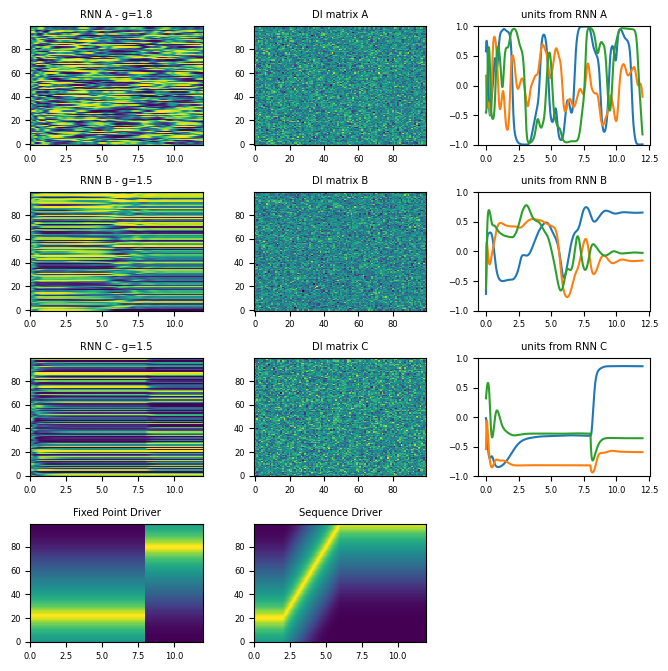

/home/stamatis/Documents/PhD/python/CURBD/curbd.py:548: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


In [2]:
# Run this only if you want a Simulation to run 

sim = curbd.threeRegionSim(number_units=100)


In [3]:
# The activity (either coming from simulated or real data)
activity = np.concatenate((sim['Ra'], sim['Rb'], sim['Rc']), 0)

Na = sim['params']['Na']
Nb = sim['params']['Nb']
Nc = sim['params']['Nc']

#Dividing the areas 
regions = []
regions.append(['Region A', np.arange(0, Na)])
regions.append(['Region B', np.arange(Na, Na + Nb)])
regions.append(['Region C', np.arange(Na + Nb, Na + Nb + Nc)])
regions = np.array(regions, dtype=object)

trial=0 pVar=0.923071 chi2=37.278561


/home/stamatis/Documents/PhD/python/CURBD/curbd.py:204: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


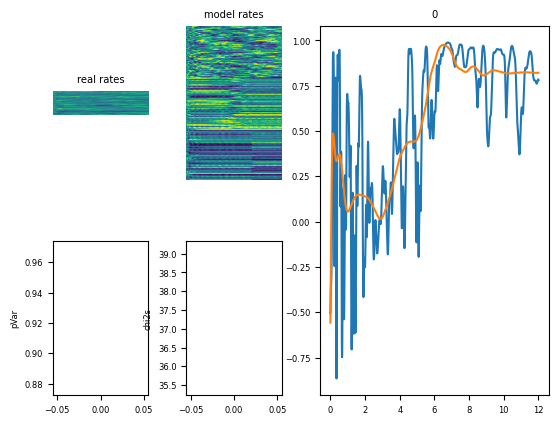

trial=1 pVar=0.968915 chi2=15.601555
trial=2 pVar=0.972968 chi2=13.027083
trial=3 pVar=0.978241 chi2=10.664432
trial=4 pVar=0.980372 chi2=9.454002
trial=5 pVar=0.982863 chi2=8.226289
trial=6 pVar=0.984798 chi2=7.344806
trial=7 pVar=0.985725 chi2=6.903563
trial=8 pVar=0.986877 chi2=6.292743
trial=9 pVar=0.987975 chi2=5.853756
trial=10 pVar=0.988175 chi2=5.690940
trial=11 pVar=0.988539 chi2=5.619861
trial=12 pVar=0.988862 chi2=5.280610
trial=13 pVar=0.989741 chi2=4.773849
trial=14 pVar=0.990152 chi2=4.549518
trial=15 pVar=0.990649 chi2=4.307844
trial=16 pVar=0.990994 chi2=4.163658
trial=17 pVar=0.991325 chi2=4.031669
trial=18 pVar=0.991561 chi2=3.933724
trial=19 pVar=0.991863 chi2=3.810122
trial=20 pVar=0.992284 chi2=3.631718
trial=21 pVar=0.992630 chi2=3.471751
trial=22 pVar=0.992854 chi2=3.347307
trial=23 pVar=0.993022 chi2=3.239691
trial=24 pVar=0.993185 chi2=3.149136
trial=25 pVar=0.993392 chi2=3.064053
trial=26 pVar=0.993629 chi2=2.974764
trial=27 pVar=0.993858 chi2=2.884968
trial=2

In [4]:
# Here we train the RNN (remember to write comments)

model = curbd.trainMultiRegionRNN(activity,
                                  dtData=sim['params']['dtData'],
                                  dtFactor=5,
                                  regions=regions,
                                  tauRNN=2*sim['params']['tau']/2,
                                  nRunTrain=400,
                                  verbose=True,
                                  nRunFree=10)

/tmp/ipykernel_6441/2708823609.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


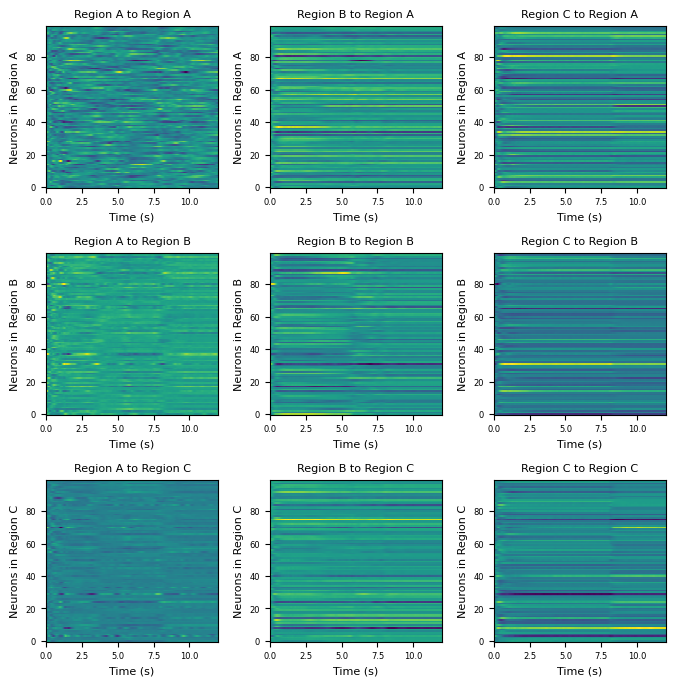

In [5]:
#Compute the Currents
[curbd_arr, curbd_labels] = curbd.computeCURBD(model)


# Make the Current figures
n_regions = curbd_arr.shape[0]
n_region_units = curbd_arr[0, 0].shape[0]

fig = pylab.figure(figsize=[8, 8])
count = 1
# here we Parse through each area making each one the source and the Receiver of the activity of all the others (and itself)
for iTarget in range(n_regions):
    for iSource in range(n_regions):
        axn = fig.add_subplot(n_regions, n_regions, count)
        count += 1
        axn.pcolormesh(model['tRNN'], range(n_region_units),
                       curbd_arr[iTarget, iSource])
        axn.set_xlabel('Time (s)')
        axn.set_ylabel('Neurons in {}'.format(regions[iTarget, 0]))
        axn.set_title(curbd_labels[iTarget, iSource])
        axn.title.set_fontsize(8)
        axn.xaxis.label.set_fontsize(8)
        axn.yaxis.label.set_fontsize(8)
fig.subplots_adjust(hspace=0.4, wspace=0.3)
fig.show()
